In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 300
pd.options.display.max_seq_items = 300

In [2]:
df = pd.read_csv('training_data_with_weather_info_week_4.csv', parse_dates=True)

df

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan-,33.000000,65.000000,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan-,33.000000,65.000000,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan-,33.000000,65.000000,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,Afghanistan-,33.000000,65.000000,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,Afghanistan-,33.000000,65.000000,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25348,35645,NaN,Zimbabwe,2020-04-07,11.0,2.0,Zimbabwe-,-17.829167,31.052222,98,...,65.3,86.0,999.9,NaN,55.4,0.460118,0.128437,7.7,0.00,0
25349,35646,NaN,Zimbabwe,2020-04-08,11.0,3.0,Zimbabwe-,-17.829167,31.052222,99,...,63.0,77.4,999.9,NaN,56.9,0.657919,0.168552,8.5,99.99,1
25350,35647,NaN,Zimbabwe,2020-04-09,11.0,3.0,Zimbabwe-,-17.829167,31.052222,100,...,59.0,78.4,999.9,NaN,57.0,0.725426,0.182599,9.3,0.00,1
25351,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0,Zimbabwe-,-17.829167,31.052222,101,...,59.0,78.4,999.9,NaN,57.0,0.725426,0.182599,9.3,0.00,1


In [3]:
list(df)

['Id',
 'Province_State',
 'Country_Region',
 'Date',
 'ConfirmedCases',
 'Fatalities',
 'country+province',
 'Lat',
 'Long',
 'day_from_jan_first',
 'temp',
 'min',
 'max',
 'stp',
 'slp',
 'dewp',
 'rh',
 'ah',
 'wdsp',
 'prcp',
 'fog']

In [4]:
# initial sort, group by country/province and then order by date
df.sort_values(by=['country+province', 'Date'])

# pct: previous item rate of change, here we get a single rate of change for one date to another
df['Infection_rate'] = df.groupby(['country+province'])['ConfirmedCases'].pct_change()

# get rid of any inf values
df.replace(np.inf, np.NaN, inplace=True)

# we dont want 0's counted when doing the mean for 
# infection rates, being np.NaN they will be ignored.
df.replace(0, np.NaN, inplace=True)

average_infection_rates = df.groupby(['country+province']).mean()['Infection_rate']

df.fillna(0)

print(average_infection_rates)

# at my time of running this: 0.37013752128455507
print(f'Average infection rate: {average_infection_rates.mean()}')

to_plot = df

country+province
Afghanistan-           0.328123
Albania-               0.250974
Algeria-               0.261876
Andorra-               0.900630
Angola-                0.327200
                         ...   
Vietnam-               0.146760
West Bank and Gaza-    0.164748
Western Sahara-             NaN
Zambia-                0.486122
Zimbabwe-              0.422708
Name: Infection_rate, Length: 313, dtype: float64
Average infection rate: 0.37013752128455507


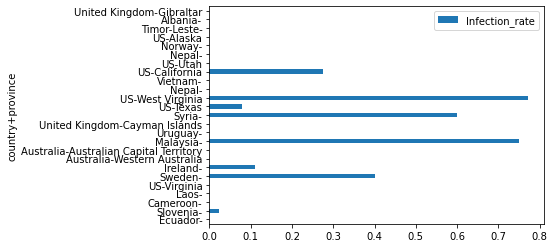

In [5]:

df.sample(n=25, random_state=1).plot.barh(x='country+province', y='Infection_rate', rot=0)

plt.show(block=True)

In [6]:

df = pd.merge(df, average_infection_rates, on='country+province')

df.to_csv(r'processed_data.csv', index = False)